# Pytorch Workflow

Let's explore a an exemple PyTorch end-to-end workflow.

Resources:
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/ 

In [ ]:
what_were_covering = {1: "data (prepare and load)",
                      2: "build model",
                      3: "fitting the model to data(training)",
                      4: "making predictions and evalueting a model(inference)",
                      5: "saving and loading a model",
                      6: "putting it all toghether"}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions and evalueting a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all toghether'}

In [ ]:
import torch
from torch import nn # nn contains all pytorch building blocks for neural networking
import matplotlib.pyplot as plt

#Check PyTorch version
torch.__version__

'1.13.1+cu116'

##1. Data (preparing and loading)

Data can be almost anything ... in machine learning.

* Excel speadsheet
* Images of any kind
* Videos (Youtube has lots of data)
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2. Build a model to learn patterns in that numerical representation.


To showcase this, let's create some *know* data using the linear regression formula.

$$y_i = α + βX_i + ϵ_i$$

We'll use a linear regression formula to make a straght line with *know* *parameter*.


In [ ]:
#Create *know * parameters 
weights = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weights * X + bias 

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X), len(y)

(50, 50)

### Splitting data into training  and test sets (one of the most important concepts in machine learning in general)

Let's create a training and test set with our data.

In [ ]:
#Create a train/test split
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explore's motto comes in!

"Visualize, visualize, visualize!"

In [ ]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
  
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  #Are there predictions?
  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

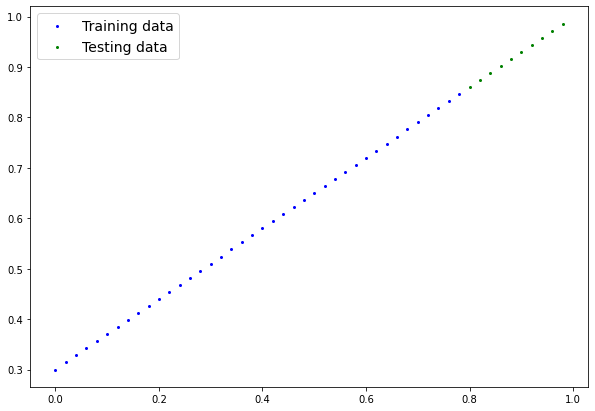

In [ ]:
plot_predictions()

##2. Build model
Our first PyTorch model!
This is very exciting... let's do it!

What our model does:
* Start with random values (weights & bias)
* Look at training data and adjust the random values to better represent (or get closer to) the ideal values  (the weight & bias values we used to create the data)

How does it do so?

1. Gradient descent - https://youtu.be/IHZwWFHWa-w
2. Backpropagation -https://youtu.be/Ilg3gGewQ5U



In [ ]:
from torch import nn
#Create a linear regression model class
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    #Forward mwethodo to define the computationm in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
    return weights * x + self.bias #this is the linear regression formula

### PyTorch model building essentials

* torch.nn - constains all of the buildings for computacional graphs (a neural network can be considered a comṕutacional graph )
* torch.nn.Parameter - what parameters should our mode3l try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The based class for all neural network models, if you subclass it, you should overall  forward()
* torch.optim - this where the optmizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

See more of these essential modules via the PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've created a model , let's see wht's inside...

So we can check our model parameters or what's inside our model using `.parameters()`. 

In [ ]:
#Create a random seed 
torch.manual_seed(42)

#Create an instance of the model
model_0 = LinearRegressionModel()

#Check out the  parameters

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
#List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
weights, bias

(0.7, 0.3)

###Making predictions using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `x_test`.

When we past data through our model, it's going to run it through the `forward()` method


In [ ]:
#Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)
# You can also do something similar with torch.no_grad(), however, inference_mode() is prefered
with torch.no_grad():
  y_preds = model_0(X_test)

y_preds

tensor([[0.6888],
        [0.7028],
        [0.7168],
        [0.7308],
        [0.7448],
        [0.7588],
        [0.7728],
        [0.7868],
        [0.8008],
        [0.8148]])

See more on inference mode here -- https://twitter.com/PyTorch/status/1437838231505096708

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

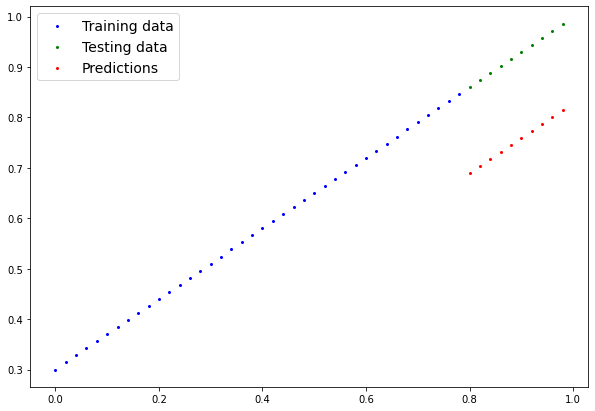

In [ ]:
plot_predictions(predictions=y_preds)

# Train model
The whole ideia fora model to move from some *unknown* parameters (these may be random ) to some *know* parameters.

Or in ohter words  from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model predictions are is to used a loss function.

* Note: Loss functions may also be called cost functions or criterion in different areas. For our case we going to refer to it as a loss functions.

Thing we need to train:

* **Loss function:** A function to meansure how wrong your model's predictions are to the ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias in our case) to improve the loss function.

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#Setup a loss function 
loss_fn = nn.L1Loss()
#Setup an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.01) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

In [ ]:
loss_fn

L1Loss()

**Q:** Wich loss function and optimizer should i use?

**A:** This will be a problem specific. But with exérience, you'll get an idea of what works and what doesn't with ypu problem set.

For example, for a regression problem(like ours), a loss function of `nn.L1Loss()` and an optmizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifyiing wheter a photo is a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()`.

from torch.autograd import grad
###Building a Training loop(and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward Pass (this involves data moving through our model's `forward()` functions) - also called forward propagation
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad.
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss(**gradient descent**)

In [ ]:
torch.manual_seed(42)
# An epoch is one loop through th data...(this is a hyperparameter because we've set it ourselfs)
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

###Training
  # 0. loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass

  y_pred = model_0(X_train)

  #2. Calculate the loss
  loss = loss_fn(y_pred, y_train)
  #print(f"Loss: {loss}")

  #3. Optimizer zero grad
  optimizer.zero_grad()

  #4. Perform backpropagation on the loss with respect to the parameters of the model
  loss.backward()

  #5. Step the optimizer (perform gradient descent)
  optimizer.step() #by default how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next interation for the loop

  ###Testing
  model_0.eval() # turns off different settings in hte model not needed for evaluation/testing (dropout/batch norm layers)
  with torch.inference_mode(): #turn off gradient tracking & a couple more things behind the scenes - https://twitter.com/PyTorch/status/1437838236529868803?s=20
    # with torch.no_grad(): #you may also see torch.no_grad() in older PyTorch code
    # 1. Do the forward pass
    test_pred = model_0(X_test)

    # 2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)

  #Print out what's happenin'
  if epoch % 10 ==0:
    epoch_count.append(epoch)
    train_loss_values.append(loss.detach().numpy())
    test_loss_values.append(test_loss.detach().numpy())
    print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
    #Print out model state dict
    #print(f"{model_0.state_dict()}")


Epoch: 0 | MAE Train Loss: 0.17119060456752777 | MAE Test Loss: 0.16119059920310974 
Epoch: 10 | MAE Train Loss: 0.07119055092334747 | MAE Test Loss: 0.06119054555892944 
Epoch: 20 | MAE Train Loss: 0.008809424936771393 | MAE Test Loss: 0.00119057297706604 
Epoch: 30 | MAE Train Loss: 0.008809424936771393 | MAE Test Loss: 0.00119057297706604 
Epoch: 40 | MAE Train Loss: 0.008809424936771393 | MAE Test Loss: 0.00119057297706604 
Epoch: 50 | MAE Train Loss: 0.008809424936771393 | MAE Test Loss: 0.00119057297706604 
Epoch: 60 | MAE Train Loss: 0.008809424936771393 | MAE Test Loss: 0.00119057297706604 
Epoch: 70 | MAE Train Loss: 0.008809424936771393 | MAE Test Loss: 0.00119057297706604 
Epoch: 80 | MAE Train Loss: 0.008809424936771393 | MAE Test Loss: 0.00119057297706604 
Epoch: 90 | MAE Train Loss: 0.008809424936771393 | MAE Test Loss: 0.00119057297706604 
Epoch: 100 | MAE Train Loss: 0.008809424936771393 | MAE Test Loss: 0.00119057297706604 
Epoch: 110 | MAE Train Loss: 0.00880942493677

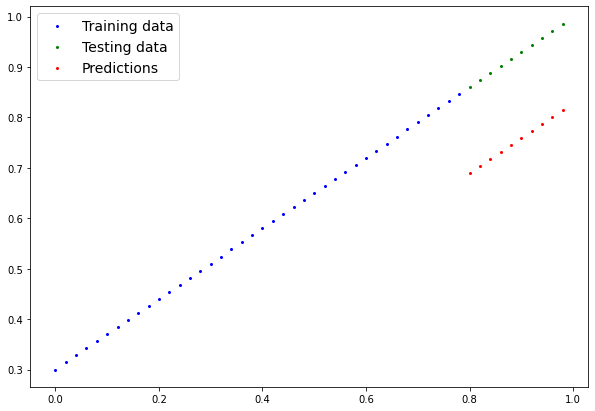

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3088]))])

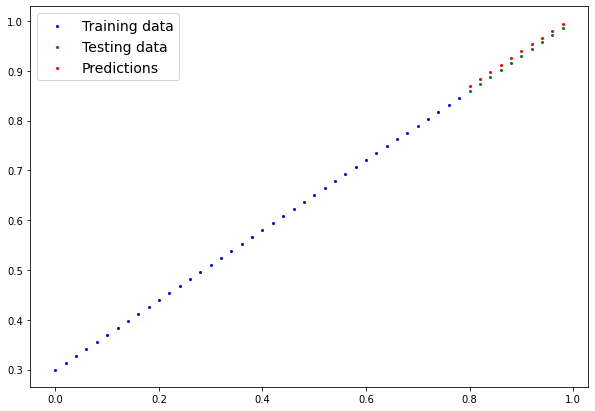

In [ ]:
plot_predictions(predictions=y_preds_new)
model_0.state_dict()

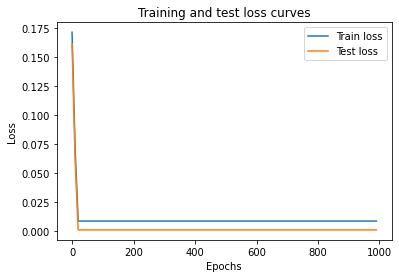

In [ ]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
model_0

LinearRegressionModel()

##Saving a model

There are three main methods you should about for saving and loading models in PyTorch.

1. `torch.save()` = aallows you save a PyTorch object in Python's pickle format 
2. `torch.load()` - allows you load a saved PyTorch object
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved state dictionary

PyTorch save and Load Tutorial - https://pytorch.org/tutorials/beginner/saving_loading_models.html



In [ ]:
#Saving your PyTorch models
from pathlib import Path

#1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

#3. SAVE THE MODEL STATE_DICT
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model.pth


In [ ]:
!ls -l models/

total 4
-rw-r--r-- 1 root root 1199 Mar 16 18:35 01_pytorch_workflow_model.pth


##Loading a PyTorch model

Since we saved our `models state_dict()` ratherthe entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.3088]))])

In [ ]:
#To load in a saved state_dict we have to instanciate a new instannce of our model class
loaded_model_0 = LinearRegressionModel()

#Load the save state_dict of model_0 (this will update the new instance with updated parameters)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8688],
        [0.8828],
        [0.8968],
        [0.9108],
        [0.9248],
        [0.9388],
        [0.9528],
        [0.9668],
        [0.9808],
        [0.9948]])

In [ ]:
#make some models preds
model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)
y_preds

tensor([[0.8688],
        [0.8828],
        [0.8968],
        [0.9108],
        [0.9248],
        [0.9388],
        [0.9528],
        [0.9668],
        [0.9808],
        [0.9948]])

In [ ]:
#Compare loaded model preds  with original model preds
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
#Aprender a salvar os modelos no google drive

## 6. Putting it all together

In [ ]:
import torch 
from torch import nn
import matplotlib.pyplot as plt

#check PyTorch version
torch.__version__

'1.13.1+cu116'

Create device-agnostic code.

This means if we've got acess to a GPU, our code will use it (for potencially faster computing).

If no GPU is avaiable, the code will default to using CPU.

In [ ]:
#Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


###6.1 Data

In [ ]:
#Create some data using the linear regression formula of y= weight * X + bias
weight = 0.8
bias =0.2

#Create a range values
start=0
end=1
step=0.002

#Create X and y (features and labels)
X = torch.arange(start, end , step).unsqueeze(dim=1) #without unsqueeze erros will pop
y =weight * X + bias
X[:10][:10]

tensor([[0.0000],
        [0.0020],
        [0.0040],
        [0.0060],
        [0.0080],
        [0.0100],
        [0.0120],
        [0.0140],
        [0.0160],
        [0.0180]])

In [ ]:
#split data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(400, 400, 100, 100)

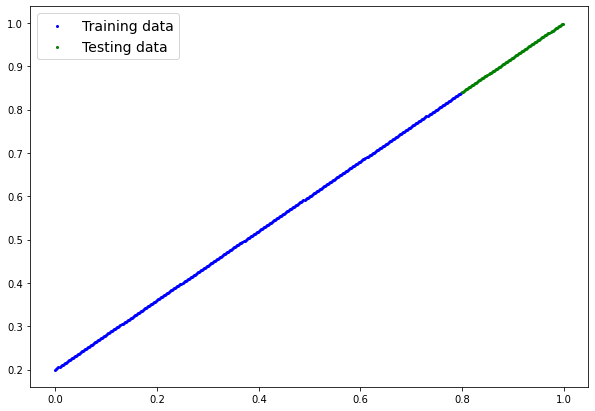

In [ ]:
plot_predictions(X_train,y_train,X_test,y_test)

##Building a pytorch linear model

In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
#check the model current device
next(model_1.parameters()).device


device(type='cpu')

In [ ]:
#Set the model to use the target device
model_1.to(device)
next(model_1.parameters()).device


device(type='cuda', index=0)

### 6.3 Training


For training we need:

* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [ ]:
#Setup the loss function

loss_fn = nn.L1Loss()#same as MAE

#setup our optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01)


In [ ]:
torch.manual_seed(42)

# Set the number of epochs 
epochs = 300

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference)
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)
    
        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 0.6158587336540222 | Test loss: 0.5845410823822021
Epoch: 10 | Train loss: 0.49993881583213806 | Test loss: 0.4486711025238037
Epoch: 20 | Train loss: 0.38401877880096436 | Test loss: 0.3128011226654053
Epoch: 30 | Train loss: 0.2680988311767578 | Test loss: 0.17693118751049042
Epoch: 40 | Train loss: 0.1521788388490677 | Test loss: 0.04106123000383377
Epoch: 50 | Train loss: 0.05851856991648674 | Test loss: 0.07140516489744186
Epoch: 60 | Train loss: 0.046311814337968826 | Test loss: 0.09602420777082443
Epoch: 70 | Train loss: 0.04236968979239464 | Test loss: 0.0960206389427185
Epoch: 80 | Train loss: 0.03892386704683304 | Test loss: 0.08985921740531921
Epoch: 90 | Train loss: 0.035506002604961395 | Test loss: 0.08224007487297058
Epoch: 100 | Train loss: 0.032089393585920334 | Test loss: 0.07434384524822235
Epoch: 110 | Train loss: 0.028673142194747925 | Test loss: 0.06637836247682571
Epoch: 120 | Train loss: 0.02525683492422104 | Test loss: 0.058343641459941864

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7961]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1971], device='cuda:0'))])

In [ ]:
###Making and evaluating predictions

#turn the model in evaluation mode

model_1.eval()

#Make predictions on the test data
with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

tensor([[0.8339],
        [0.8355],
        [0.8371],
        [0.8387],
        [0.8403],
        [0.8419],
        [0.8435],
        [0.8451],
        [0.8467],
        [0.8482],
        [0.8498],
        [0.8514],
        [0.8530],
        [0.8546],
        [0.8562],
        [0.8578],
        [0.8594],
        [0.8610],
        [0.8626],
        [0.8642],
        [0.8658],
        [0.8674],
        [0.8689],
        [0.8705],
        [0.8721],
        [0.8737],
        [0.8753],
        [0.8769],
        [0.8785],
        [0.8801],
        [0.8817],
        [0.8833],
        [0.8849],
        [0.8865],
        [0.8881],
        [0.8896],
        [0.8912],
        [0.8928],
        [0.8944],
        [0.8960],
        [0.8976],
        [0.8992],
        [0.9008],
        [0.9024],
        [0.9040],
        [0.9056],
        [0.9072],
        [0.9088],
        [0.9103],
        [0.9119],
        [0.9135],
        [0.9151],
        [0.9167],
        [0.9183],
        [0.9199],
        [0

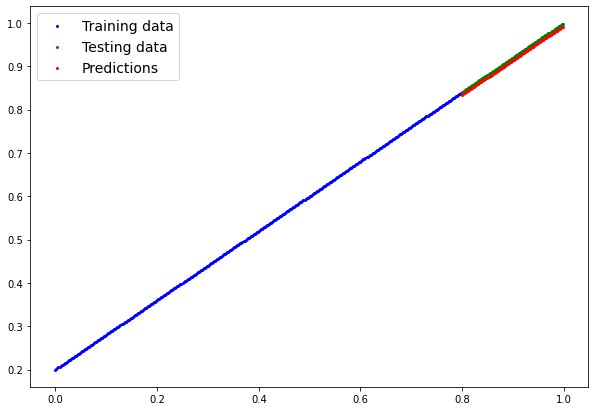

In [ ]:
#visualize
plot_predictions(predictions = y_preds.cpu())

##Saving and Loading a trained model

In [ ]:
from pathlib import Path

#1. CReate models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path

MODEL_NAME = "01_PYTORCH_WORKFLOW_MODEL_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_PYTORCH_WORKFLOW_MODEL_1.pth


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7961]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1971], device='cuda:0'))])

In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict 
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cuda:0


In [ ]:
next(loaded_model_1.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7961]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.1971], device='cuda:0'))])

In [ ]:
#Evaluate loadedmodel

loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
loaded_model_1_preds[:10] == y_preds[:10]


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')

#Exercicices & extra curriculum

For Exercicices - https://www.learnpytorch.io/01_pytorch_workflow/#exercises

For extra curriculum - https://www.learnpytorch.io/01_pytorch_workflow/#extra-curriculum